# Ayudantía 01 - Series de Tiempo I

#### correo: daniela.diaz@sansano.usm.cl


In [1]:
#Importar los datos de la serie de tiempo gas
import numpy as np
import pandas as pd
data = pd.read_csv('gas.txt', header = None)
st=list(data[0])

In [2]:
#crear una lista de tiempo

import datetime

numdays=len(st)
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(numdays)]


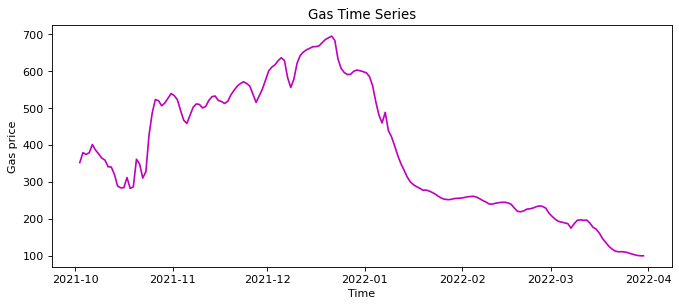

In [3]:
#visualización de la serie original
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4), dpi=80)
plt.plot(date_list,st,c='m')
plt.title('Gas Time Series')
plt.xlabel('Time')
plt.ylabel('Gas price')
plt.show()

## <font color='blue'>Suavecimiento exponencial simple</font>  [[1]](https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html)


In [4]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

gas_data=pd.Series(st,date_list)

ses=SimpleExpSmoothing(gas_data, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False)
gas_data_ses=ses.fittedvalues


/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


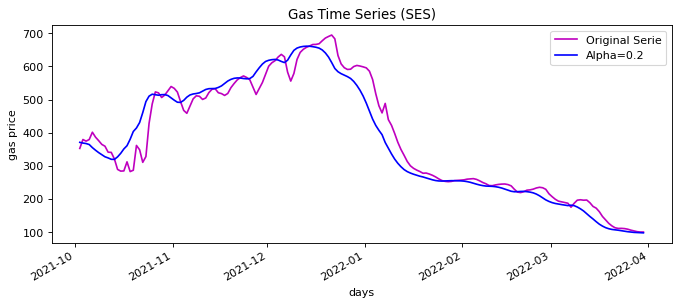

In [5]:
plt.figure(figsize=(10, 4), dpi=80)
gas_data.plot(c='m',label='Original Serie')
plt.plot(gas_data_ses,c='b', label='Alpha=0.2')
plt.title('Gas Time Series (SES)')
plt.xlabel('days')
plt.ylabel('gas price')
plt.legend()
plt.show()

In [6]:
# estimación del alpha
ses_a = SimpleExpSmoothing(gas_data, initialization_method="estimated").fit()
fcastgas = ses_a.forecast(3).rename(r"$\alpha=%s$" % ses_a.model.params["smoothing_level"])

/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [7]:
fcastgas.name

'$\\alpha=0.995$'

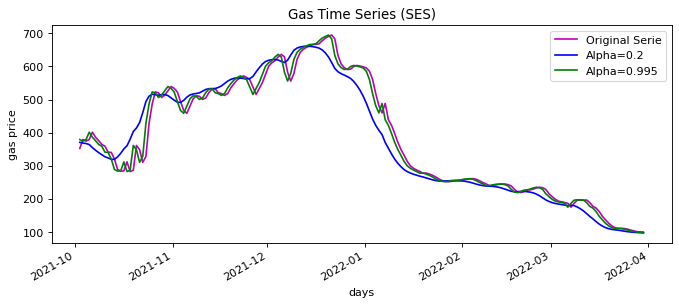

In [8]:
plt.figure(figsize=(10, 4), dpi=80)
gas_data.plot(c='m',label='Original Serie')
plt.plot(gas_data_ses,c='b', label='Alpha=0.2')
plt.plot(ses_a.fittedvalues,c='g', label='Alpha=0.995')
plt.title('Gas Time Series (SES)')
plt.xlabel('days')
plt.ylabel('gas price')
plt.legend()
plt.show()

# <font color='blue'>__Filtrado de Series Cronológicas__</font>  

## <font color='blue'>__Diferenciación__</font>  


In [9]:
df_ap=pd.read_csv('AirPassengers.csv')
month=pd.date_range(start='1/1/1949', end='1/1/1961', freq='M')
df_ap['Month']=month
df_ap

,Month,#Passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121
...,...,...
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390


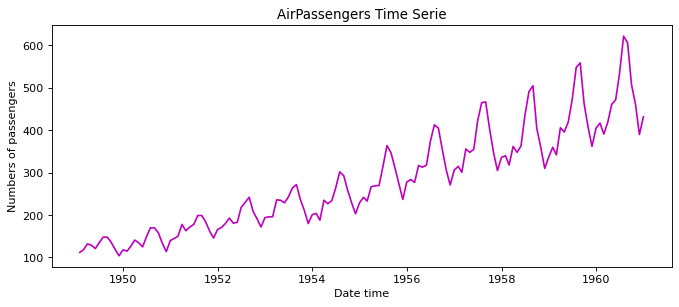

In [10]:
plt.figure(figsize=(10, 4), dpi=80)
plt.plot(df_ap['Month'],df_ap['#Passengers'],c='m')
plt.title('AirPassengers Time Serie')
plt.xlabel('Date time')
plt.ylabel('Numbers of passengers')
plt.show()

In [11]:
count=0
aux=[]
for i in np.arange(0,len(df_ap['#Passengers'])):
    
    if i==0:
        #print('b')
        aux.append(0)
    else:
        aux.append(df_ap['#Passengers'][i]-df_ap['#Passengers'][i-1])

df_diff=pd.DataFrame(list(zip(df_ap['Month'],aux)),columns=['Month','Passengers'])
df_diff

,Month,Passengers
0,1949-01-31,0
1,1949-02-28,6
2,1949-03-31,14
3,1949-04-30,-3
4,1949-05-31,-8
...,...,...
139,1960-08-31,-16
140,1960-09-30,-98
141,1960-10-31,-47
142,1960-11-30,-71


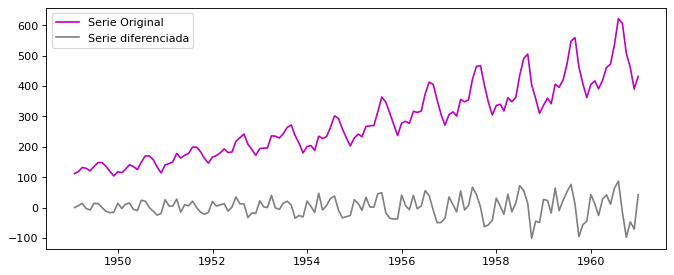

In [12]:
plt.figure(figsize=(10, 4), dpi=80)

plt.plot(df_ap['Month'],df_ap['#Passengers'],c='m',label='Serie Original')
plt.plot(df_diff['Month'],df_diff['Passengers'],c='gray',label='Serie diferenciada')
plt.legend()
plt.show()


## <font color='blue'>__Medias Moviles__</font>  


In [13]:
rolling=df_ap.rolling(window=3)
rolling_mean = rolling.mean()

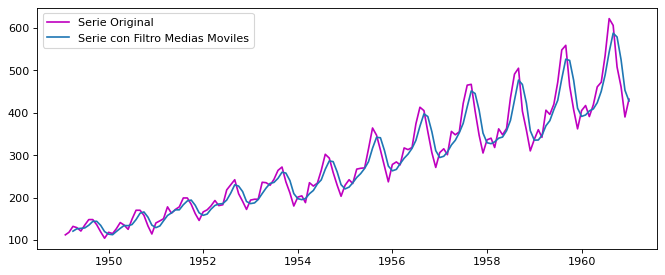

In [14]:
plt.figure(figsize=(10, 4), dpi=80)

plt.plot(df_ap['Month'],df_ap['#Passengers'],c='m',label='Serie Original')
plt.plot(df_ap['Month'],rolling_mean,label='Serie con Filtro Medias Moviles')
plt.legend()
plt.show()


## <font color='blue'>__Transformaciones que estabilizan la varianza__</font>  


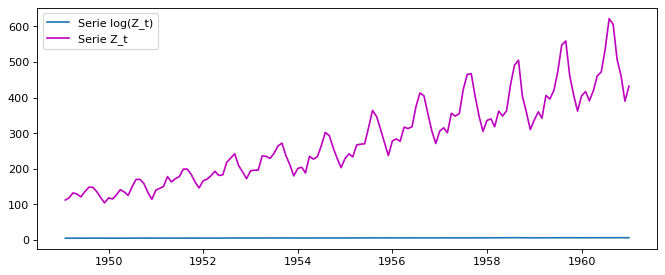

In [15]:
log=np.log(df_ap['#Passengers'])
plt.figure(figsize=(10,4),dpi=80)
plt.plot(df_ap['Month'],log,label='Serie log(Z_t)')
plt.plot(df_ap['Month'],df_ap['#Passengers'], c='m',label='Serie Z_t')
plt.legend()
plt.show()

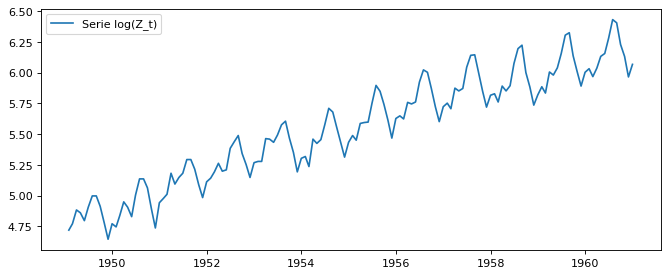

In [16]:
plt.figure(figsize=(10,4),dpi=80)
plt.plot(df_ap['Month'],log,label='Serie log(Z_t)')
plt.legend()
plt.show()


## <font color='blue'>__Metodo de Descomposición__</font>  


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df_ap['#Passengers'], model='additive', period=12)

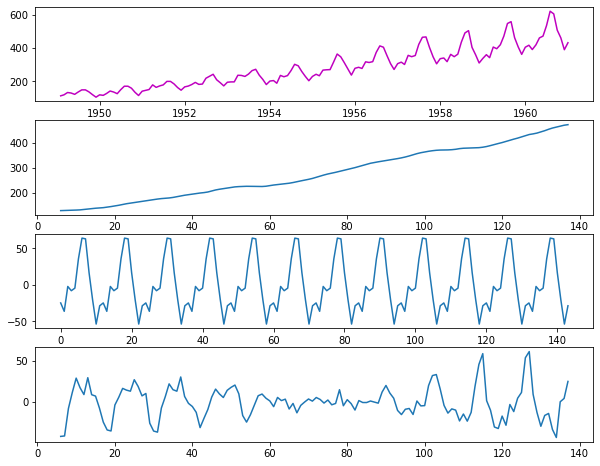

In [18]:
fig, axs = plt.subplots(4,figsize=(10,8))

axs[0].plot(df_ap['Month'],df_ap['#Passengers'],c='m')
axs[1].plot(result.trend)
axs[2].plot(result.seasonal)
axs[3].plot(result.resid)
plt.show()

<Figure size 800x640 with 0 Axes>

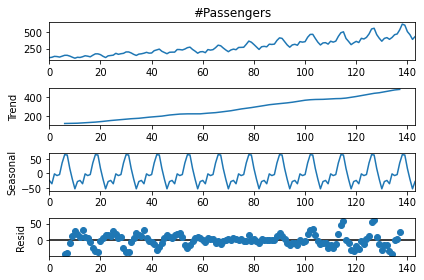

In [19]:
plt.figure(figsize=(10, 8), dpi=80)

result.plot()
plt.show()


# <font color='blue'>__Metodo de Holt Winters__</font>  


/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


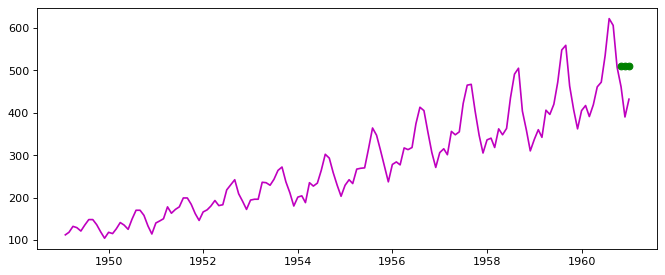

In [20]:
y_to_train=df_ap['#Passengers'][:-3]
predict_date=df_ap['Month'][-3:]

fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3)

plt.figure(figsize=(10,4),dpi=80)
plt.plot(df_ap['Month'],df_ap['#Passengers'],c='m')
plt.plot(df_ap['Month'][-3:],list(fcast1),c='g',marker='o')
plt.show()